### Задача uplift-моделирования

### План занятия

* Введение: коммуникация с пользователями
* Дизайн эксперимента
* Типы клиентов
* Одна модель с дополнительным признаком
* Вариант с двумя независимыми моделями
* Вариант с двумя зависимыми моделями
* Прямой расчет uplift: "деревянные" модели
* Ссылки

### Введение

Часто возникает необходимость коммуникации с пользователями для продвижения сервисов и услуг.

Коммуникация осуществляется с помощью различных каналов: смс, звонки, push-уведомления, сообщения в чатботе и т.д

Например, мы хотим отправить push-уведомление игрокам в мобильной игре о том, что у них заполнились склады или об ином внутриигровом событии. Либо даже хотим отправить уведомление о наступающем внутриигровом эвенте (которые очень важны для активных игроков и для монетизации и развития игры в целом).

Другой пример:

Мы хотим прорекламировать популярный продукт, но при этом не хотим тратить бюджет на коммуникацию с пользователями, которые и без нас его купят. 

Изначально вопрос у нас такой: <b>Какова вероятность, что пользователь совершит нужное нам действие?</b>

Но нам нужен ответ не на него.

### Пример - задача прогнозирования оттока

Подробно задачу будем разбирать на следующем занятии, но давайте договоримся, что решать мы ее уже умеем.

Т.е мы для пользователей нашего сервиса можем посчитать вероятность ухода в отток.


<img src='https://drive.google.com/uc?export=view&id=1yfreITE308yEYmfBI4Iv1Y3vqfmZt-GB' width=400>


Мы можем для пользователя определить вероятность:

P(User)

Мы хотим удерживать наших пользователей, которые чем-то недовольны или несчастны и хотим им предложить более выгодные условия подписки или тарифа (например, если мы - мобильный оператор, то мы можем предложить нашим абонентам более выгодный тариф).

Хорошо, мы можем отобрать из нашей аудитории наиболее "несчастных". Почему бы просто не сделать им предложение? В чем проблема? 

Проблема в том, что разные пользователи реагируют на коммуникацию по-разному и каждое взаимодействие стоит для нас денег.

И еще проблема - <b>наша модель неидеальна!</b>

#### Типы пользователей по реакции на коммуникацию

<img src='https://drive.google.com/uc?export=view&id=1ClmgUARlS_jJUpRLwmaNF24iFj6B2vqz' width=700>

https://drive.google.com/file/d/1-Uy2w-r7TwR1682EpDRurMe2XaAEEc21/view?usp=sharing

1. Пользователи, которые совершат нужное действие независимо от коммуникации
2. Те, кто совершат действие, если будет коммуникация
3. Те, кто не совершит действие независимо от коммуникации
4. Не совершат действие, если коммуникация будет

Для оптимизации эффекта от воздействия хочется посчитать разницу реакций пользователя при наличии коммуникации и при ее отсутствии. 

Проблема в том, что мы не можем одновременно совершить коммуникацию и не совершить коммуникацию.

<img src='https://drive.google.com/uc?export=view&id=1e1axM0aFq71SirVwtJhu1f3pjyHZ3u7K' width=400>

Что же делать?

Необходимо оценить разницу между двумя событиями, которые являются взаимоисключающими для конкретного пользователя.

Для этого нам нужна обучающая выборка. А для нее нужно просто провести эксперимент. 

1. Берем часть базы пользователей и разбиваем на 2 группы: контрольную и экспериментальную
2. На экспериментальной группе запускаем маркетинговую кампанию (совершаем коммуникацию)
3. Через какое-то время у нас есть результаты совершения нужного действия клиентами в обеих группах (включая контрольную)
4. Проводим uplift-моделирование

<img src='https://drive.google.com/uc?export=view&id=1GRONjFrhYfzasGnC5FTNwWon4Rdtol36'>

$P(Y=1|W=0)$ - Условная вероятность, что выполнена цель без коммуникации (1 - если действие совершено, 0 - если не совершено)<br>
$P(Y=1|W=1)$ - Условная вероятность, что выполнена цель при коммуникации (1 - если действие совершено, 0 - если не совершено)

<img src='https://drive.google.com/uc?export=view&id=1wY6NZGbdrEkiWozOGHZV2G7r83wk-G4T'>

*взято из https://habr.com/ru/company/ru_mts/blog/485980/

### Пример модели с дополнительным признаком

Другие названия: Treatment Dummy approach, Solo model approach, Single model approach, S-Learner 

$W_i$ - информация о коммуникации<br>
$y_i$ - целевое действие

<img src='https://drive.google.com/uc?Export=view&id=1wOjm_cgfj_zp-3ruUopq1zO0Ih8-m1N2' width=700>


Модель одна, но с разными значениями признака $W_i$.

Но в целом признак $W_i$ некая фикция, потому что не может быть такого клиента, с которым мы и говорили и не говорили одновременно.

### Две независимые модели

Другие названия: Two models approach, T-learner, difference two models

Интуитивно понятный и простой метод - моделируем 2 условные вероятности

1. обучаем модель прогноза вероятности совершения целевого действия для контрольной группы
2. обучаем модель прогноза вероятности совершения целевого действия для экспериментальной группы
3. на прогнозе - делаем прогноз для тестовых пользователей двумя моделями и вычитаем из прогноза второй модели прогноз первой

<img src='https://drive.google.com/uc?export=view&id=1Yiaw17DkGosB0BJ12BgfkzfWOAjaCY2H' width=700>


Модели получаются независимыми, а значит нет четкого совмещения вероятностей первой модели со второй.
И хорошо бы перед тем, как вычитать вероятности, как-то откалибровать модели. 

Можно, к примеру, для обучения одной модели использовать знание о решении первой модели, то есть получаются уже перекрестные модели.


<img src="https://raw.githubusercontent.com/maks-sh/scikit-uplift/master/docs/_static/images/TwoModels_ddr_control.png" width=600>

p(y=1|w=1), p(y=1|w=0)

[Текст ссылки](https://)### ПЕРЕРЫВ ДО 20:50
 (МСК)

In [25]:
!pip install scikit-uplift catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Практический пример с соревнования X5 

http://retailhero.ai/#rec141268104

Импортируем нужные библиотеки и предобработаем данные: ==0.22

In [27]:
import catboost

catboost.__version__

'1.0.6'

In [28]:
#from google.colab import drive
#drive.mount('/gdrive')

In [29]:
%matplotlib inline

import pandas as pd; pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split


# Чтение данных
df_clients = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/clients.csv', index_col='client_id')
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/uplift_train.csv', index_col='client_id')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/uplift_test.csv', index_col='client_id')

# Извлечение признаков
df_features = df_clients.copy()
df_features['first_issue_time'] = \
    (pd.to_datetime(df_features['first_issue_date'])
     - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
df_features['first_redeem_time'] = \
    (pd.to_datetime(df_features['first_redeem_date'])
     - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
df_features['issue_redeem_delay'] = df_features['first_redeem_time'] \
    - df_features['first_issue_time']
df_features = df_features.drop(['first_issue_date', 'first_redeem_date'], axis=1)
df_features.fillna(0, inplace=True)
# разбираем примеры на 2 группы : train /val - пока только по индексам клиентов
indices_train = df_train.index  # индексы, для которых знаем результат  
indices_test = df_test.index # индексы, для которых не знаем результат (можем просто дать модели поработать потом)
indices_learn, indices_valid = train_test_split(df_train.index, test_size=0.3, random_state=123) # разбили известный набор на 2 части

In [30]:
df_clients

,first_issue_date,first_redeem_date,age,gender
client_id,,,,
000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
000048b7a6,2018-12-15 13:33:11,NaN,68,F
000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F
00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U
...,...,...,...,...
fffece623e,2018-05-13 15:09:30,2018-12-27 19:06:39,67,U
ffff3dfff8,2018-11-01 16:06:52,2018-12-07 17:33:47,56,F
ffffaab9da,2017-08-25 18:43:24,2017-12-08 17:53:19,23,F


In [31]:
df_features.head()


,age,gender,first_issue_time,first_redeem_time,issue_redeem_delay
client_id,,,,,
000012768d,45,U,1501947648,1.515094e+09,13146559.0
000036f903,72,F,1491832463,1.492951e+09,1118613.0
000048b7a6,68,F,1544880791,0.000000e+00,0.0
000073194a,60,F,1495544174,1.511522e+09,15978107.0
00007c7133,67,U,1495469828,1.546277e+09,50806825.0


In [32]:
df_test.head(3)

""
client_id
000048b7a6
000073194a
00007c7133


In [33]:
df_train

,treatment_flg,target
client_id,,
000012768d,0,1
000036f903,1,1
00010925a5,1,1
0001f552b0,1,1
00020e7b18,1,1
...,...,...
fffe0abb97,0,0
fffe0ed719,0,1
fffea1204c,0,1


Посмотрим на целевое свойство:

In [34]:
df_train.groupby("treatment_flg")['target'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment_flg,,,,,,,,
0,100058.0,0.603280,0.489219,0.0,0.0,1.0,1.0,1.0
1,99981.0,0.636511,0.481006,0.0,0.0,1.0,1.0,1.0


Заведем переменные для работы uplift модели

In [35]:
# данные для обучения
X_train = df_features.loc[indices_learn, :] # признаки о клиенте (в них остались только описания клиентов )
y_train = df_train.loc[indices_learn, 'target'] #целевой признак (те кто сделал правильное действие)
treat_train = df_train.loc[indices_learn, 'treatment_flg']  #те кому написали смс с предложением
#данные для валидации
X_val = df_features.loc[indices_valid, :]
y_val = df_train.loc[indices_valid, 'target']
treat_val =  df_train.loc[indices_valid, 'treatment_flg']
#весь набор целиком
X_train_full = df_features.loc[indices_train, :]
y_train_full = df_train.loc[:, 'target']
treat_train_full = df_train.loc[:, 'treatment_flg']
#данные из теста (слепые)
X_test = df_features.loc[indices_test, :]
# наш категорийный признак
cat_features = ['gender']
# словарь для записывания результатов
models_results = {
    'approach': [],
    'uplift@30%': []
}

Описание клиента:

In [36]:
X_train.head()

,age,gender,first_issue_time,first_redeem_time,issue_redeem_delay
client_id,,,,,
ad6561e2d8,50,F,1512322431,1.527102e+09,14779510.0
7c1ccbf93f,24,F,1510331629,1.519326e+09,8994516.0
b58fadcab6,36,U,1509657465,1.537045e+09,27387871.0
e99e6fabb9,79,F,1526466080,1.527713e+09,1247284.0
27fb6f8520,34,F,1500320188,1.513332e+09,13012137.0


Описание воздействия:

In [37]:
treat_train

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    0
16cb4f99b0    0
23c2b72b2e    1
1430184499    0
Name: treatment_flg, Length: 140027, dtype: int64

Описание нужного действия (сделал/не сделал)

In [38]:
y_train

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    1
16cb4f99b0    1
23c2b72b2e    1
1430184499    1
Name: target, Length: 140027, dtype: int64

In [39]:
from sklearn.utils.validation import check_consistent_length
import matplotlib.pyplot as plt

# замена для родной функции из skuplift
def plot_uplift_preds_(trmnt_preds, ctrl_preds, log=False, bins=100):
    """Plot histograms of treatment, control and uplift predictions.

    Args:
        trmnt_preds (1d array-like): Predictions for all observations if they are treatment.
        ctrl_preds (1d array-like): Predictions for all observations if they are control.
        log (bool): Logarithm of source samples. Default is False.
        bins (integer or sequence): Number of histogram bins to be used. Default is 100.
            If an integer is given, bins + 1 bin edges are calculated and returned.
            If bins is a sequence, gives bin edges, including left edge of first bin and right edge of last bin.
            In this case, bins is returned unmodified. Default is 100.

    Returns:
        Object that stores computed values.
    """

    # TODO: Add k as parameter: vertical line on plots
    check_consistent_length(trmnt_preds, ctrl_preds)
  
    if not isinstance(bins, int) or bins <= 0:
        raise ValueError(
            f'Bins should be positive integer. Invalid value for bins: {bins}')

    if log:
        trmnt_preds = np.log(trmnt_preds + 1)
        ctrl_preds = np.log(ctrl_preds + 1)

    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 7))
    axes[0].hist(
        trmnt_preds, bins=bins, alpha=0.3, color='b', label='Treated', histtype='stepfilled')
    axes[0].set_ylabel('Probability hist')
    axes[0].legend()
    axes[0].set_title('Treatment predictions')

    axes[1].hist(
        ctrl_preds, bins=bins, alpha=0.5, color='y', label='Not treated', histtype='stepfilled')
    axes[1].legend()
    axes[1].set_title('Control predictions')

    axes[2].hist(
        trmnt_preds - ctrl_preds, bins=bins, alpha=0.5, color='green', label='Uplift', histtype='stepfilled')
    axes[2].legend()
    axes[2].set_title('Uplift predictions')

    return axes

### 1. Подходы с одной моделью
#### 1.1 Одна модель с признаком коммуникации
Самое простое и интуитивное решение: модель обучается одновременно на двух группах, при этом бинарный флаг коммуникации выступает в качестве дополнительного признака. Каждый объект из тестовой выборки скорим дважды: с флагом коммуникации равным 1 и равным 0. Вычитая вероятности по каждому наблюдению, получим искомы uplift.

<img src='https://drive.google.com/uc?export=view&id=1toKV1iLuOXcuKUTIut5i_7-EgigDsYdf' width=700>

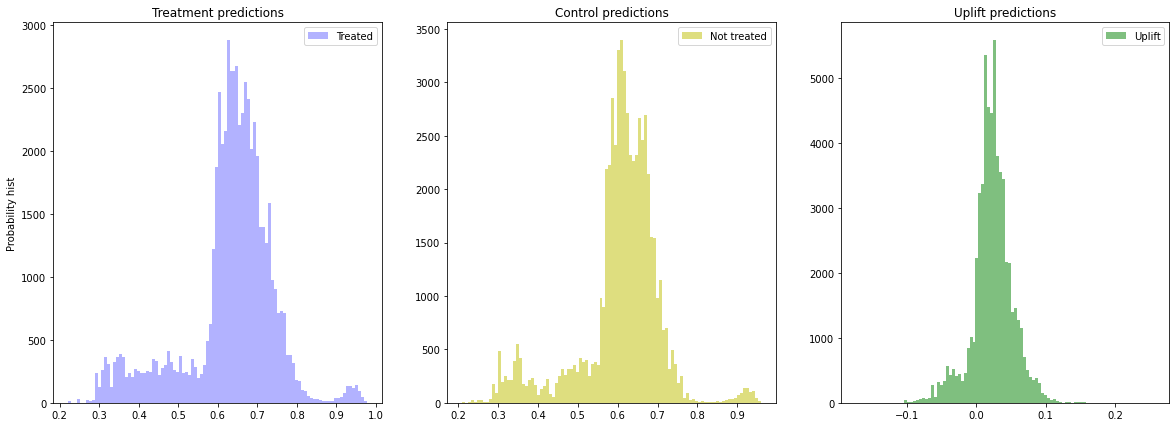

In [40]:
# Инструкция по установке пакета: https://github.com/maks-sh/scikit-uplift
# Ссылка на документацию: https://scikit-uplift.readthedocs.io/en/latest/
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds ## в новой версии проблема (беру свой вариант)
from sklift.models import SoloModel

# sklift поддерживает любые модели, 
# которые удовлетворяют соглашениями scikit-learn
# Для примера воспользуемся catboost
from catboost import CatBoostClassifier

N =20000
sm = SoloModel(  CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
sm = sm.fit( X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_sm = sm.predict(X_val)

# размер uplift на топ k процентах выборки
sm_score = uplift_at_k( y_true=y_val, uplift=uplift_sm, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('SoloModel')
models_results['uplift@30%'].append(sm_score)

# Получим условные вероятности выполнения целевого действия при взаимодействии для каждого объекта
sm_trmnt_preds = sm.trmnt_preds_
# И условные вероятности выполнения целевого действия без взаимодействия для каждого объекта
sm_ctrl_preds = sm.ctrl_preds_

# Отрисуем распределения вероятностей и их разность (uplift)
plot_uplift_preds(   sm_trmnt_preds , sm_ctrl_preds, bins=100);#ctrl_preds=

#### uplift@k

$$uplift@k = response\space rate@k_{treatment} - response\space  rate@k_{control}$$ 
$$response\space  rate@k = mean(Y@k)$$


Размер uplift на топ k процентах выборки.

Например, с помощью обученной uplift модели мы хотим отобрать какое-то количество клиентов, с которыми будем коммуницировать. Пусть бюджет рассчитан на k% клиентов. Тогда нам интересно оценить качество прогноза не на всей тестовой выборке, а только на объектах с наибольшими предсказаниями при отсечении по порогу в k процентов.

Для расчета uplift@k нужно отсортировать выборку по величине предсказанного uplift и посмотреть разницу средних значений таргета Y в экспериментальной и контрольной группах.

Теоретический **uplift@k** принимает значения от -1 (когда в целевой группе нет реакций Y=1, а в контрольной группе все клиенты имеют реакцию Y=1) и может достигать величины 1 (противоположная ситуация: в целевой группе все клиенты откликнулись: Y=1, в то время как в контрольной - ни одного случая с Y=1). 


Рассчитывать эту метрику можно двумя различными способами:
1. сначала сортировать по предсказанному uplift и далее считать разницу response rate двух групп (`strategy='overall'`)
2. или наоборот, изначально сортировать объекты из контрольной и целевой групп по отдельности (`strategy='by_group'`)

In [41]:
n = 15
df = pd.DataFrame({
    'true': y_val[:n],
    'uplift': uplift_sm[:n],
    'treat': treat_val[:n]
})   
df 

,true,uplift,treat
client_id,,,
a9a604ed6e,0,-0.002221,1
ebd7360016,1,0.044462,0
908cd9b8e8,1,0.055119,1
dceb8ce861,0,0.012658,0
f4f0ac6b06,0,0.018084,0
5047ab8574,0,0.026925,1
e3574a0076,1,0.033572,1
4789764e7d,0,0.018636,1
7e66529579,1,0.027664,1


In [42]:

k = 0.7

uplift_at_k(y_true=df['true'], uplift=df['uplift'], treatment=df['treat'],
            # strategy='by_group',
            strategy='overall',
            k=k)

-0.4

In [43]:
df_k = df.sort_values(by='uplift', ascending=False).head(int(n * k))
df_k

,true,uplift,treat
client_id,,,
908cd9b8e8,1,0.055119,1
ebd7360016,1,0.044462,0
2c1ea1e175,1,0.039352,0
e3574a0076,1,0.033572,1
5f9a02e6a5,1,0.029808,0
7e66529579,1,0.027664,1
5047ab8574,0,0.026925,1
2c90382a10,1,0.026808,0
81486dfd30,1,0.025498,0


In [44]:
response_rate_treat = df_k[(df_k.treat == 1)].true.mean()
response_rate_control = df_k[(df_k.treat == 0)].true.mean()
response_rate_treat - response_rate_control

-0.4

In [45]:
k = 5
uplift_at_k(y_true=df['true'], uplift=df['uplift'], treatment=df['treat'],
            strategy='by_group',
            # strategy='overall',
            k=k)

-0.4

In [46]:
df_k_treat = df[df.treat == 1]
df_k_treat = df_k_treat.sort_values(by='uplift', ascending=False).head(k)

df_k_control = df[df.treat == 0]
df_k_control = df_k_control.sort_values(by='uplift', ascending=False).head(k)
df_k_treat

,true,uplift,treat
client_id,,,
908cd9b8e8,1,0.055119,1
e3574a0076,1,0.033572,1
7e66529579,1,0.027664,1
5047ab8574,0,0.026925,1
4789764e7d,0,0.018636,1


In [47]:
df_k_control

,true,uplift,treat
client_id,,,
ebd7360016,1,0.044462,0
2c1ea1e175,1,0.039352,0
5f9a02e6a5,1,0.029808,0
2c90382a10,1,0.026808,0
81486dfd30,1,0.025498,0


In [48]:
response_rate_treat = df_k_treat.true.mean()
response_rate_control = df_k_control.true.mean()
response_rate_treat - response_rate_control

-0.4

##### Uplift curve

$$uplift \space curve(t) = (\frac{Y^T_t}{N^T_t} - \frac{Y^C_t}{N^C_t})(N^T_t + N^C_t) $$
$t$ - накопившиеся количество объектов<br>
$Y^T_t, Y^C_t$ - таргет в treatment и control группах<br>
$N^T_t, N^C_t$ - размер treatment и control групп<br>


Uplift кривая строится как функция от количества объектов, нарастающим итогом. В каждой точке кривой можно увидеть накопленный к этому моменту uplift

На картинке ниже расположен типичный график идеальной, модельной и случайной кривых. Каждая точка на такой кривой соответствует значению кумулятивного uplift. Чем больше это значение, тем лучше. Монотонно возрастающая случайная кривая показывает, что воздействие всей выборки имеет общий положительный эффект. 

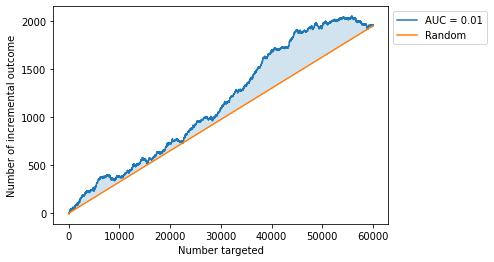

In [49]:
from sklift.viz import plot_uplift_curve


# with ideal curve
# perfect=True
plot_uplift_curve(y_val, uplift_sm, treat_val, perfect=False); # perfect=True

##### Qini curve
Еще одной довольно распространенной кривой при оценке uplift моделей является Qini кривая.

$$qini\ curve (t) = Y^T_t - \frac{Y^C_t N^T_t}{N^C_t}$$

$Y^T_t, Y^C_t$ - таргет в treatment и control группе<br>
$N^T_t, N^C_t$ - размер treatment и control групп



Qini curve, как и другие аплифт метрики, рассчитывается кумулятивно сразу для набора объектов. Кривую Qini для модели тоже сравнивают со случайной кривой и с идеальным случаем. Аналогично с uplift кривой, чем выше кривая над случайной кривой, тем лучше. 

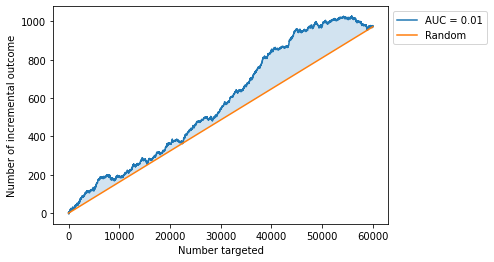

In [50]:
from sklift.viz import plot_qini_curve


# with ideal Qini curve (red line)
# perfect=True
plot_qini_curve(y_val, uplift_sm, treat_val, perfect=False);

In [51]:
from sklift.metrics import qini_auc_score


# коэффициент qini, или area under qini curve (AUQC)
auqc = qini_auc_score(y_val, uplift_sm, treat_val) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.0070


##### Uplift by percentile

Бывает так, что со стороны бизнеса не известно значение порога k и хочется посмотреть, как будет вести себя метрика при разных значениях порога k.

При построении действуем по аналогии с uplift@k:
1. Сортируем по предсказанному значению uplift
2. Делим отсортированные данные на перцентили / децили / бины.
3. В каждом перцентиле отдельно оцениваем uplift как разность между средними значениями целевой переменной в тестовой и контрольной группах.



Результатом этой метрики является таблица или ее визуальное представление в виде графика.

Давайте также для каждого перцентиля рассчитаем следующие показатели:

1. n_treatment - размер целевой (или treatment) группы 
2. n_control - размер контрольной (control) группы
3. response_rate_treatment - среднее значение таргета целевой группы
4. response_rate_control - среднее значение таргета контрольной группы
5. uplift = response_rate_treatment - response_rate_control

Дополнительно добавим расчет среднеквадратичного отклонения для каждой метрики (std_treatment, std_control, std_uplift) для того, чтобы оценивать разброс метрики в каждом перцентиле.

In [52]:
from sklift.metrics import uplift_by_percentile

# uplift by decile, или  uplift by percentile, или uplift by bin.
uplift_by_percentile(y_val, uplift_sm,  treat_val, 
                     strategy='overall', 
                     total=True, std=True, bins=10)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,n_treatment,n_control,response_rate_treatment,response_rate_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,2992,3010,0.709225,0.649502,0.059723,0.008302,0.008697,0.012023
10-20,3011,2991,0.673530,0.660983,0.012547,0.008546,0.008656,0.012163
20-30,2960,3041,0.665203,0.632358,0.032845,0.008674,0.008744,0.012316
30-40,3015,2986,0.665340,0.626256,0.039084,0.008594,0.008854,0.012338
40-50,2994,3007,0.650301,0.612571,0.037730,0.008715,0.008884,0.012445
50-60,3038,2963,0.659645,0.607830,0.051815,0.008597,0.008969,0.012424
60-70,3112,2889,0.651028,0.595708,0.055320,0.008544,0.009130,0.012505
70-80,3058,2943,0.612165,0.575943,0.036222,0.008811,0.009110,0.012674
80-90,2959,3042,0.547482,0.534517,0.012965,0.009150,0.009044,0.012865


Если визуализировать таблицу, то получится график uplift by percentile. По нему удобно оценивать эффективность модели. 

Так как коммуникация будет проводиться с клиентами, получившими наибольшую оценку uplift, то слева на графике должны быть максимальные по модулю положительные значения uplift и в следующих перцентилях значения уменьшаются.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


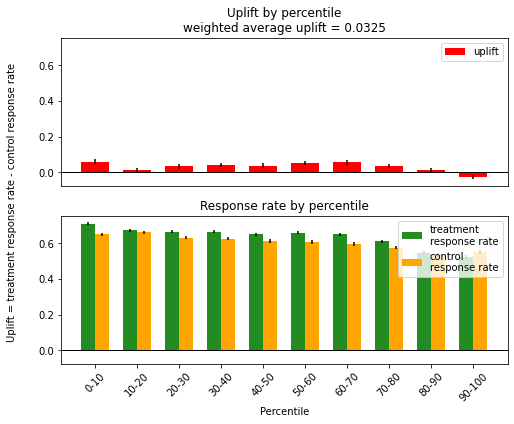

In [53]:
from sklift.viz import plot_uplift_by_percentile

# график uplift by percentile
plot_uplift_by_percentile(y_val, uplift_sm, treat_val, 
                          strategy='overall', kind='bar'); # line

В левой части графика находятся убеждаемые — тот тип, которых мы хотим найти. 

В терминах целевого действия и коммуникации это Y=1 при W=1 и Y=0 при W=0.


Еще метрики:


Weighted average uplift лежит в пределах от [-1, 1]. Если метрика принимает значение 1, это значит, что реакций Y=1 в контрольной группе нет ни в одном перцентиле: пользователи никогда не выполняют целевое действие самостоятельно, а только при коммуникации. При таком значении метрики нет смысла решать задачу с помощью uplift моделирования.

Значение метрики может доходить до граничного значения -1. Это будет означать, что во всех перцентилях uplft был равен -1. Такое происходит, когда в целевой группе нет реакций Y=1, а в контрольной группе все клиенты имеют реакцию Y=1. Получается, что значения метрики, которые нас устраивают в рамках решения uplift задачи, лежат в пределах [0, 1)

In [54]:
from sklift.metrics import weighted_average_uplift

# с помощью значений в столбцах uplift и n_treatment рассчитаем усредненный uplift на всей выборке, 
# взвешенный на размер целевой группы — weighted average uplift
uplift_full_data = weighted_average_uplift(y_val, uplift_sm, 
                                            treat_val, bins=10) 
print(f"weighted average uplift on full data: {uplift_full_data:.4f}")

weighted average uplift on full data: 0.0317


Посмотрим на топ-признаки

In [55]:
# С той же легкостью можно обратиться к обученной модели.
# Например, чтобы построить важность признаков:
sm_fi = pd.DataFrame({
    'feature_name': sm.estimator.feature_names_,
    'feature_score': sm.estimator.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

sm_fi

,feature_name,feature_score
0,first_redeem_time,44.503470
1,issue_redeem_delay,37.136251
2,age,7.075808
3,first_issue_time,5.801921
4,treatment,3.322136
5,gender,2.160415


#### 1.2 Трансформация классов
Достаточно интересный и математически подтвержденный подход к построению модели, представленный еще в 2012 году. Метод заключается в прогнозировании немного измененного таргета:

### 1.2 Трансформация классов
Достаточно интересный и математически подтвержденный подход к построению модели, представленный еще в 2012 году. Метод заключается в прогнозировании немного измененного таргета:

$$Z_i = Y_i \cdot W_i + (1 - Y_i) \cdot (1 - W_i),$$
где
- $Z_i$ - новая целевая переменная $i$-того клиента
- $Y_i$ - целевая переменная $i$-того клиента
- $W_i$ - флаг коммуникации $i$-того клиента



Другими словами:

$$
Z_i = \begin{cases}
    1, & \mbox{if } W_i = 1 \mbox{ and } Y_i = 1 \\
    1, & \mbox{if } W_i = 0 \mbox{ and } Y_i = 0 \\
    0, & \mbox{otherwise}
   \end{cases}
$$

<img src='https://drive.google.com/uc?export=view&id=1ClmgUARlS_jJUpRLwmaNF24iFj6B2vqz' width=600>

In [56]:
from sklift.models import ClassTransformation


ct = ClassTransformation(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
ct = ct.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_ct = ct.predict(X_val)

ct_score = uplift_at_k(y_true=y_val, uplift=uplift_ct, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('ClassTransformation')
models_results['uplift@30%'].append(ct_score)

In [57]:
ct_score

0.05738718188867742

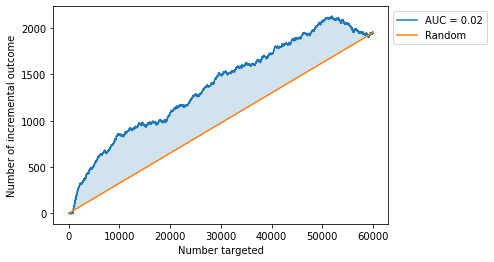

In [58]:
from sklift.viz import plot_uplift_curve


# with ideal curve
# perfect=True
plot_uplift_curve(
    y_val, uplift_ct, treat_val, 
    # perfect=True
    perfect=False
);

#### 2.1 Две независимые модели
Как понятно из названия, подход заключается в моделировании условных вероятностей тестовой и контрольной групп отдельно. В статьях утверждается, что такой подход достаточно слабый, так как обе модели фокусируются на прогнозировании результата отдельно и поэтому могут пропустить "более слабые" различия в выборках.

<img src='https://drive.google.com/uc?export=view&id=1dcexXj_GQqrYHDDuTLB1rXOhaxzNHx0x' width=700>

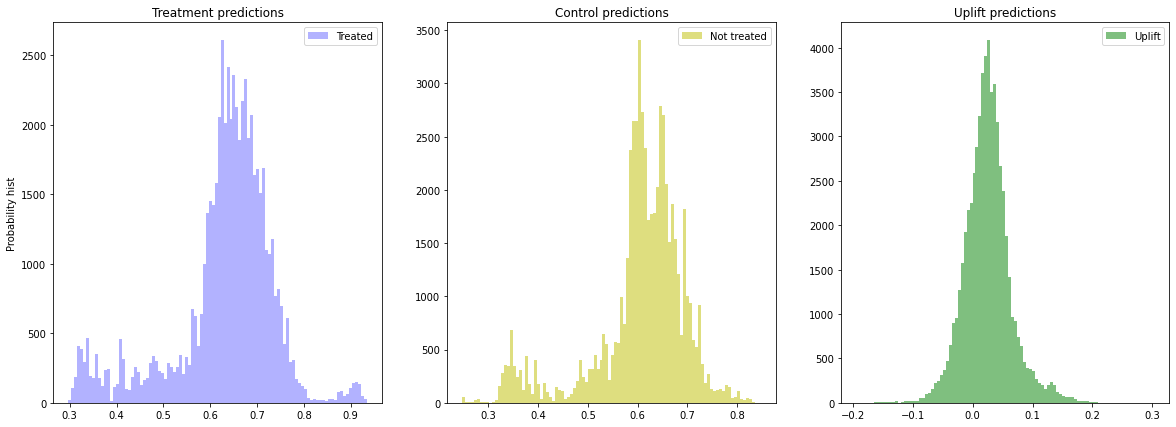

In [59]:
from sklift.models import TwoModels


tm = TwoModels(     
    estimator_trmnt=CatBoostClassifier(iterations=10, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(iterations=10, thread_count=2, random_state=42, silent=True), 
    method='vanilla'
)   

# method ='ddr_control' ('ddr_treatment') - зависимые модели
tm = tm.fit(
    X_train, y_train, treat_train,
    estimator_trmnt_fit_params={'cat_features': cat_features}, 
    estimator_ctrl_fit_params={'cat_features': cat_features}
)

uplift_tm = tm.predict(X_val)

tm_score = uplift_at_k(y_true=y_val, uplift=uplift_tm, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('TwoModels')
models_results['uplift@30%'].append(tm_score)

plot_uplift_preds_(trmnt_preds=tm.trmnt_preds_, ctrl_preds=tm.ctrl_preds_);

Посмотрим на результаты

In [60]:
pd.DataFrame(data=models_results).sort_values('uplift@30%', ascending=False)

,approach,uplift@30%
1,ClassTransformation,0.057387
2,TwoModels,0.048547
0,SoloModel,0.034983


	approach	uplift@30%
1	ClassTransformation	0.061775
2	TwoModels	0.051637
0	SoloModel	0.041614

Solo Model


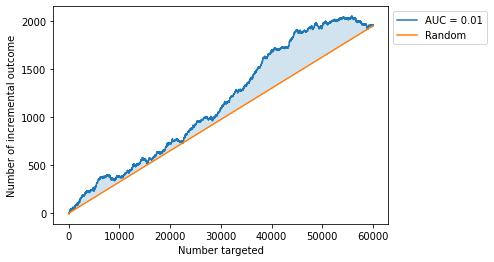

Two Model


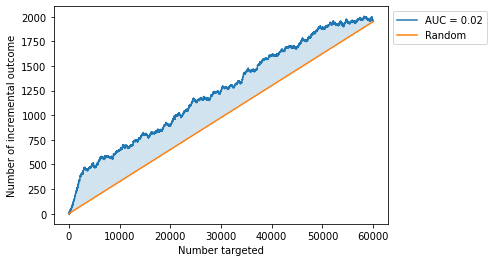

ClassTransform Model


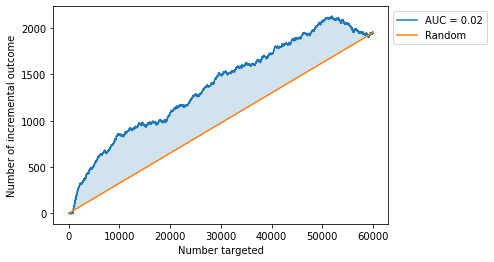

In [61]:
print('Solo Model')

plot_uplift_curve(y_val, uplift_sm, treat_val, perfect=False)
plt.show()
print('Two Model')
plot_uplift_curve(y_val, uplift_tm, treat_val, perfect=False)
plt.show()
print('ClassTransform Model')
plot_uplift_curve(y_val, uplift_ct, treat_val, perfect=False)
plt.show()




In [62]:
from sklift.metrics import uplift_by_percentile

uplift_by_percentile(y_val,uplift_ct, treat_val, 
                     strategy='overall', 
                     total=True, std=True, bins=10)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,n_treatment,n_control,response_rate_treatment,response_rate_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,3295,2707,0.763278,0.660510,0.102768,0.007405,0.009101,0.011733
10-20,2971,3031,0.684281,0.640053,0.044229,0.008527,0.008718,0.012195
20-30,2982,3019,0.660630,0.648890,0.011740,0.008671,0.008687,0.012274
30-40,2980,3021,0.639262,0.604436,0.034826,0.008797,0.008896,0.012511
40-50,2943,3058,0.634387,0.590909,0.043478,0.008878,0.008891,0.012564
50-60,2991,3010,0.599799,0.583721,0.016078,0.008958,0.008985,0.012688
60-70,2984,3017,0.608244,0.576732,0.031512,0.008936,0.008995,0.012679
70-80,3024,2977,0.623016,0.594894,0.028122,0.008813,0.008997,0.012594
80-90,2956,3045,0.608593,0.590805,0.017788,0.008977,0.008910,0.012648


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


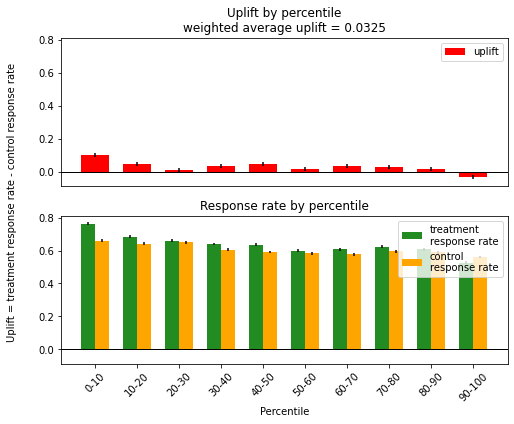

In [63]:
plot_uplift_by_percentile(y_val, uplift_ct, treat_val, 
                          strategy='overall', kind='bar'); # line

### Домашнее задание

1. скачать набор данных маркетинговых кампаний отсюда https://www.kaggle.com/davinwijaya/customer-retention
2. поле conversion - это целевая переменная, а offer - коммуникация. Переименовать поля (conversion -> target, offer -> treatment) и привести поле treatment к бинарному виду (1 или 0, т.е было какое-то предложение или нет) - значение No Offer означает отсутствие коммуникации, а все остальные - наличие.
3. сделать разбиение набора данных не тренировочную и тестовую выборки
4. провести uplift-моделирование 3 способами:
    1. одна модель с признаком коммуникации (S-learner)
    2. модель с трансформацией таргета
    3. вариант с двумя независимыми моделями
5. в конце вывести единую таблицу сравнения метрик uplift@10%, uplift@20% 3 моделей
6. *для модели S-learner построить зависимость таргета (конверсии - поле conversion) от значения uplift:
    1. сделать прогноз и получить uplift для тестовой выборки
    2. отсортировать тестовую выборку по uplift по убыванию
    3. разбить на децили (pandas qcut вам в помощь)
    4. для каждого дециля посчитать среднюю conversion

https://ods.ai/tracks/open-source-soc2021/competitions/scikit-uplift-hack-soc2021

### Ссылки

1. https://towardsdatascience.com/a-quick-uplift-modeling-introduction-6e14de32bfe0
2. https://habr.com/ru/company/ru_mts/blog/485980/#reference1

3. https://en.wikipedia.org/wiki/Uplift_modelling
4. https://www.youtube.com/watch?v=yFQAIJBYXI0
5. https://www.youtube.com/watch?v=jCUcYiBK03I
6. https://www.uplift-modeling.com/en/latest/
7. https://arxiv.org/pdf/1809.04559.pdf
8. https://catboost.ai/docs/concepts/about.html
9. Метрики https://habr.com/ru/company/ru_mts/blog/538934/


### Библиотеки и пакеты

1. causalml
2. sklift
3. catboost

In [64]:
!pip install causalml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 406 kB 3.9 MB/s 
     |████████████████████████████████| 569 kB 46.5 MB/s 
     |████████████████████████████████| 1.8 MB 37.2 MB/s 
     |████████████████████████████████| 718 kB 9.5 MB/s 
  Created wheel for causalml: filename=causalml-0.12.3-cp37-cp37m-linux_x86_64.whl size=1053935 sha256=48b03466ec40de44aab025437160829ba5081c6880b271b433f2db4c577262e0
  Stored in directory: /root/.cache/pip/wheels/d7/5e/47/4e965cf8e87c6c10cd7361d910acccd08a1de459f25d55fd23
Successfully built causalml


In [65]:
# данные для обучения
X_train = df_features.loc[indices_learn, :] # признаки о клиенте (в них остались только описания клиентов )
y_train = df_train.loc[indices_learn, 'target'] #целевой признак (те кто сделал правильное действие)
treat_train = df_train.loc[indices_learn, 'treatment_flg']  #те кому написали смс с предложением
#данные для валидации
X_val = df_features.loc[indices_valid, :]
y_val = df_train.loc[indices_valid, 'target']
treat_val =  df_train.loc[indices_valid, 'treatment_flg']

In [66]:
X_train_tree = pd.concat([X_train.drop('gender', 1), 
                          pd.get_dummies(X_train['gender'], prefix='gender')], 1)
features = [col for col in X_train_tree]

X_train_tree.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  


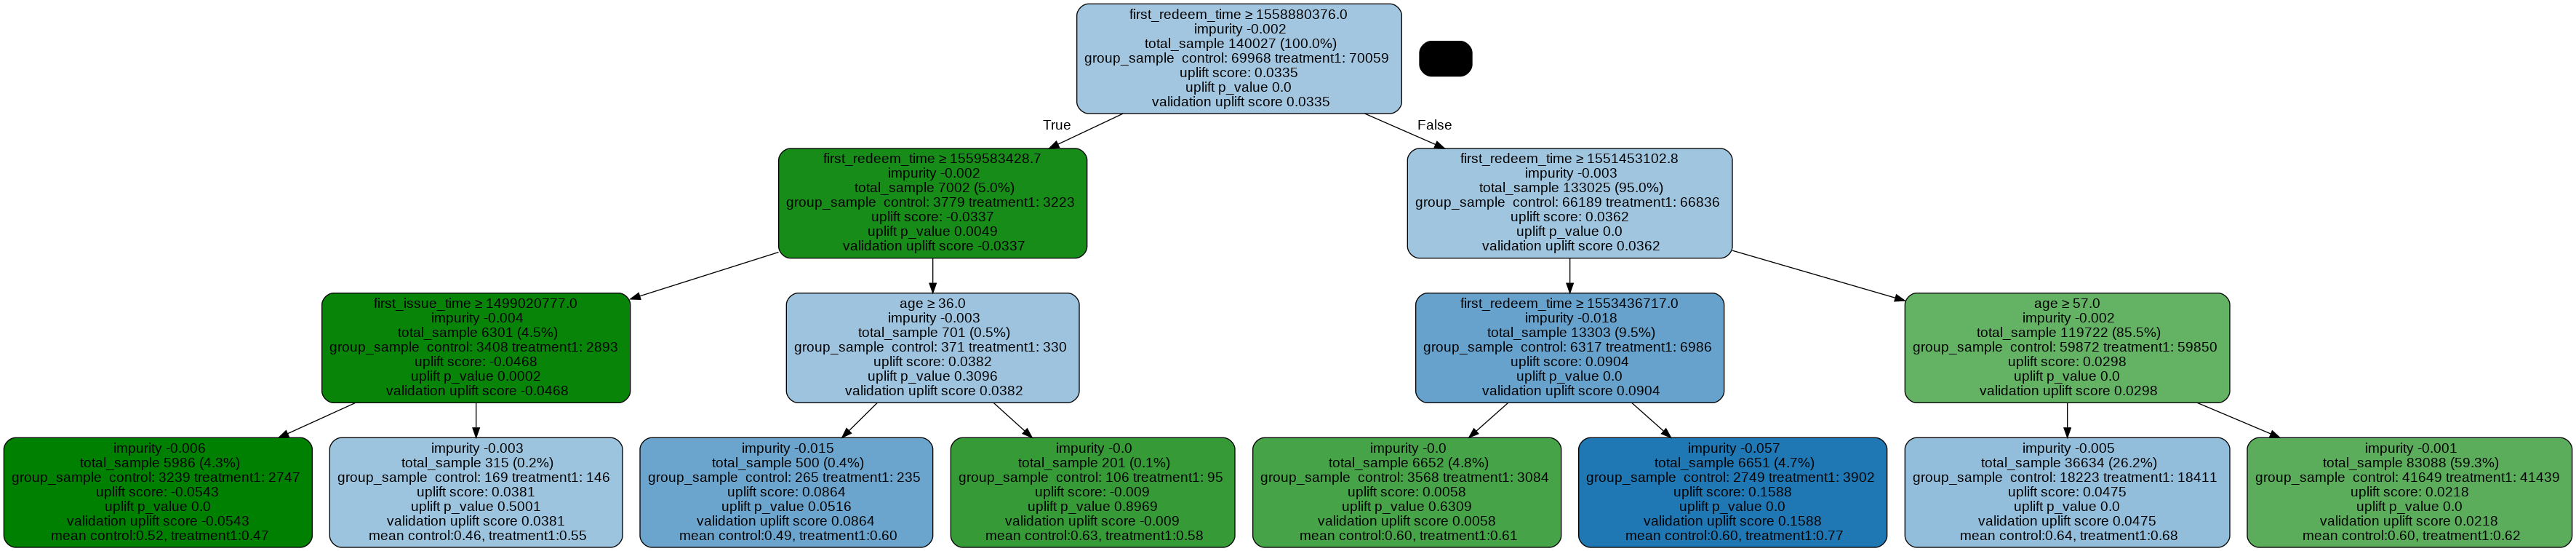

In [67]:

from IPython.display import Image
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

uplift_model = UpliftTreeClassifier(max_depth=4, min_samples_leaf=200, min_samples_treatment=50,
                                    n_reg=100, evaluationFunction='KL', control_name='control')

uplift_model.fit(X_train_tree.values,
                 treatment=treat_train.map({1: 'treatment1', 0: 'control'}).values,
                 y=y_train)

graph = uplift_tree_plot(uplift_model.fitted_uplift_tree, features)
Image(graph.create_png())

In [68]:
from IPython.display import Image, display

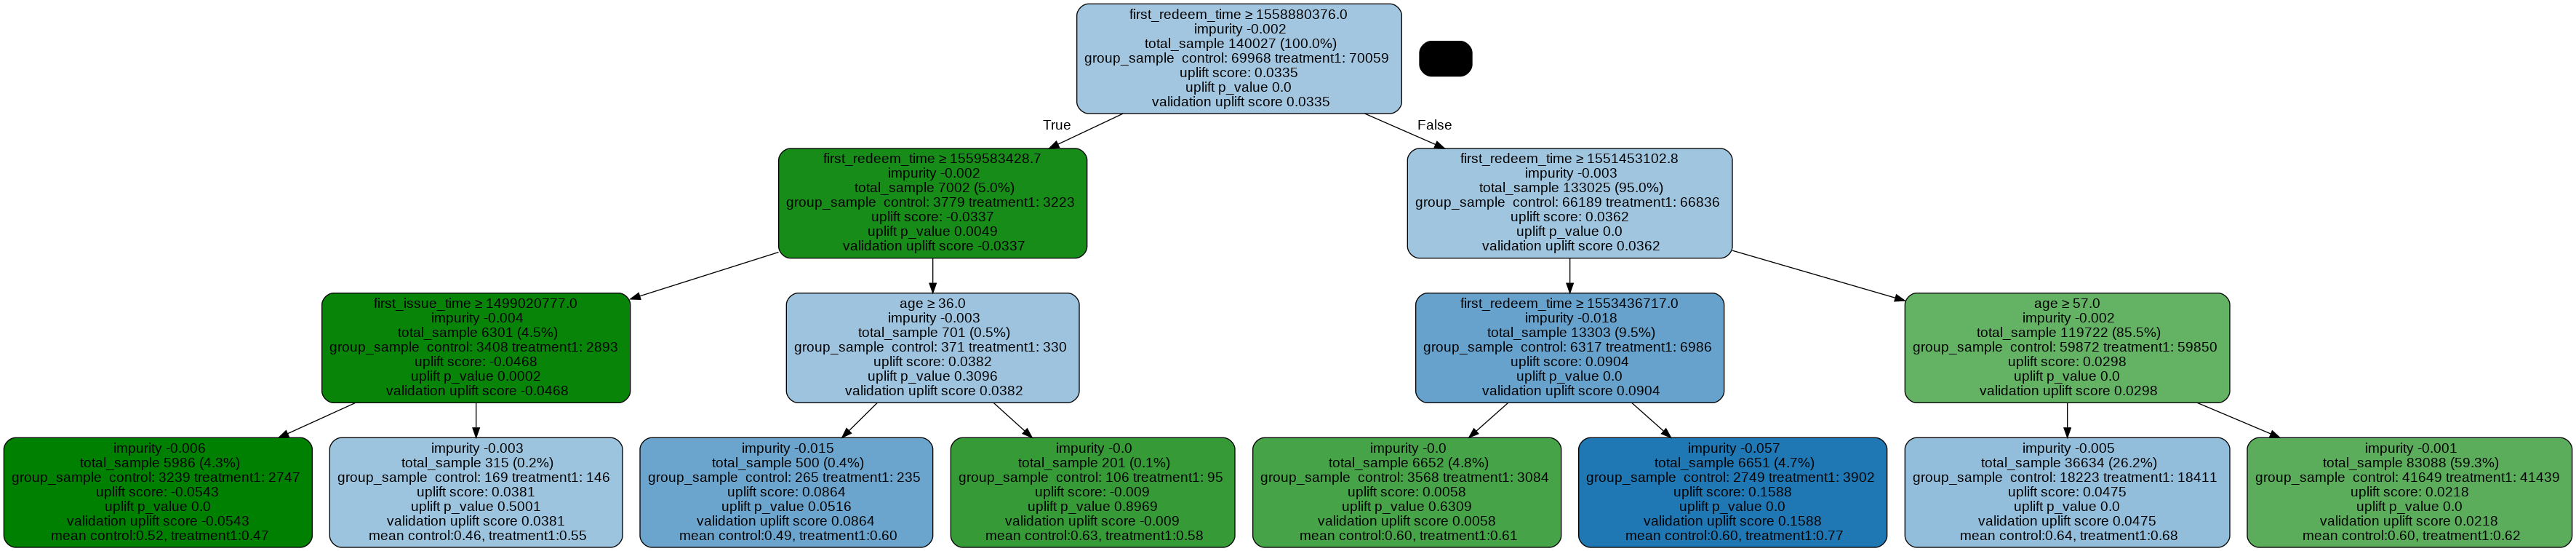

In [69]:

display(Image(graph.create_png()))

In [70]:
#скачать набор данных маркетинговых кампаний отсюда https://www.kaggle.com/davinwijaya/customer-retention
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/data.csv', sep=',')
df.head(3)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0


In [71]:
#поле conversion - это целевая переменная, а offer - коммуникация. 
#Переименовать поля (conversion -> target, offer -> treatment) и привести поле treatment 
#к бинарному виду (1 или 0, т.е было какое-то предложение или нет) - 
#значение No Offer означает отсутствие коммуникации, а все остальные - наличие.
df.rename(columns = {'offer' : 'treatment', 'conversion' : 'target'}, inplace = True) 
df.head(2)


,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0


In [72]:
df['treatment'] = df['treatment'].apply(lambda x: 0 if x=='No Offer' else 1)

In [73]:
df.tail(15)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target
63985,9,29.99,1,0,Urban,0,Phone,1,1
63986,9,35.26,0,1,Urban,1,Web,1,0
63987,1,79.70,1,0,Surburban,1,Web,0,0
63988,6,32.98,1,0,Surburban,0,Web,1,0
63989,10,304.30,1,1,Surburban,0,Web,1,1
63990,6,80.02,0,1,Surburban,0,Phone,0,0
63991,1,306.10,1,0,Surburban,1,Phone,1,0
63992,1,519.69,1,1,Urban,1,Phone,1,0
63993,4,374.07,0,1,Surburban,0,Phone,1,0
63994,7,86.46,0,1,Urban,0,Web,1,0


In [74]:
cat_feature = ['zip_code', 'channel']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size=0.25, random_state=46, stratify=df['target'])

In [76]:
treat_train = X_train['treatment']
X_train.drop(columns='treatment', inplace=True)
treat_val = X_test['treatment']
X_test.drop(columns='treatment', inplace=True)

провести uplift-моделирование 3 способами:
одна модель с признаком коммуникации (S-learner)
модель с трансформацией таргета
вариант с двумя независимыми моделями

In [77]:
metrics_df = {
    'models': [],
    'uplift@10%': [],
    'uplift@20%': [],
    'uplift@30%': []
}


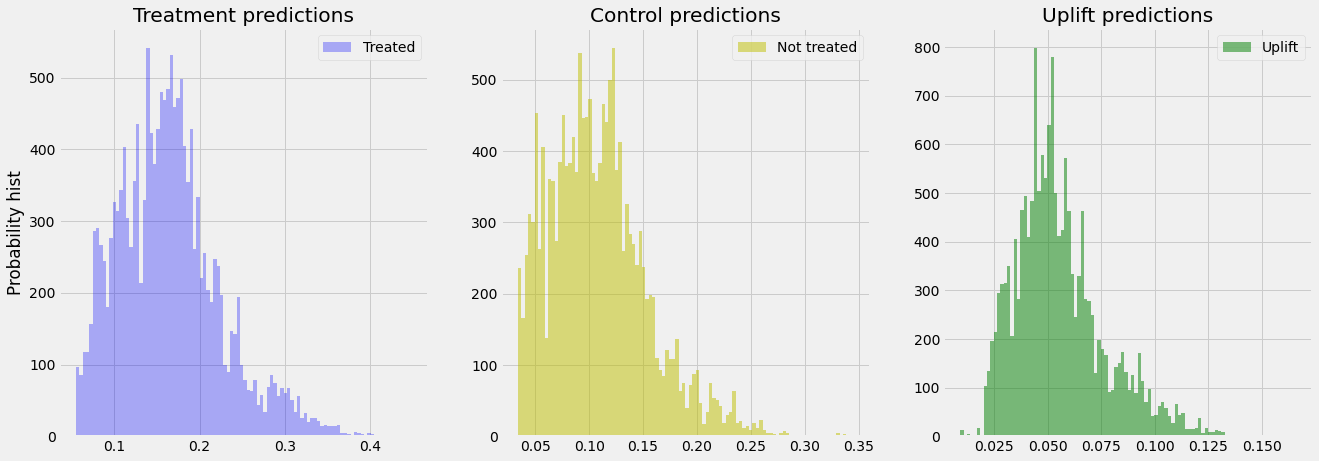

In [78]:

sm = SoloModel(  CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
sm = sm.fit( X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_feature})

uplift_sm = sm.predict(X_test)

# размер uplift на топ k процентах выборки
sm_score_1 = uplift_at_k( y_true=y_test, uplift=uplift_sm, treatment=treat_val, strategy='by_group', k=0.1)
sm_score_2 = uplift_at_k( y_true=y_test, uplift=uplift_sm, treatment=treat_val, strategy='by_group', k=0.2)
sm_score_3= uplift_at_k( y_true=y_test, uplift=uplift_sm, treatment=treat_val, strategy='by_group', k=0.3)

metrics_df['models'].append('SoloModel')
metrics_df['uplift@10%'].append(sm_score_1)
metrics_df['uplift@20%'].append(sm_score_2)
metrics_df['uplift@30%'].append(sm_score_3)

# Получим условные вероятности выполнения целевого действия при взаимодействии для каждого объекта
sm_trmnt_preds = sm.trmnt_preds_
# И условные вероятности выполнения целевого действия без взаимодействия для каждого объекта
sm_ctrl_preds = sm.ctrl_preds_

# Отрисуем распределения вероятностей и их разность (uplift)
plot_uplift_preds(   sm_trmnt_preds , sm_ctrl_preds, bins=100);#ctrl_preds=

In [79]:
metrics_df

{'models': ['SoloModel'],
 'uplift@10%': [0.12767099075213836],
 'uplift@20%': [0.10705557745368546],
 'uplift@30%': [0.10387159570174692]}

In [80]:
from sklift.models import ClassTransformation


ct = ClassTransformation(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
ct = ct.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_feature})

uplift_ct = ct.predict(X_test)

ct_score_1 = uplift_at_k(y_true=y_test, uplift=uplift_ct, treatment=treat_val, strategy='by_group', k=0.1)
ct_score_2 = uplift_at_k(y_true=y_test, uplift=uplift_ct, treatment=treat_val, strategy='by_group', k=0.2)
ct_score_3 = uplift_at_k(y_true=y_test, uplift=uplift_ct, treatment=treat_val, strategy='by_group', k=0.3)

metrics_df['models'].append('ClassTransformation')
metrics_df['uplift@10%'].append(ct_score_1)
metrics_df['uplift@20%'].append(ct_score_2)
metrics_df['uplift@30%'].append(ct_score_3)

In [81]:
ct_score

0.05738718188867742

In [82]:
metrics_df

{'models': ['SoloModel', 'ClassTransformation'],
 'uplift@10%': [0.12767099075213836, 0.12032741007269931],
 'uplift@20%': [0.10705557745368546, 0.09272237550913151],
 'uplift@30%': [0.10387159570174692, 0.08593159237815473]}

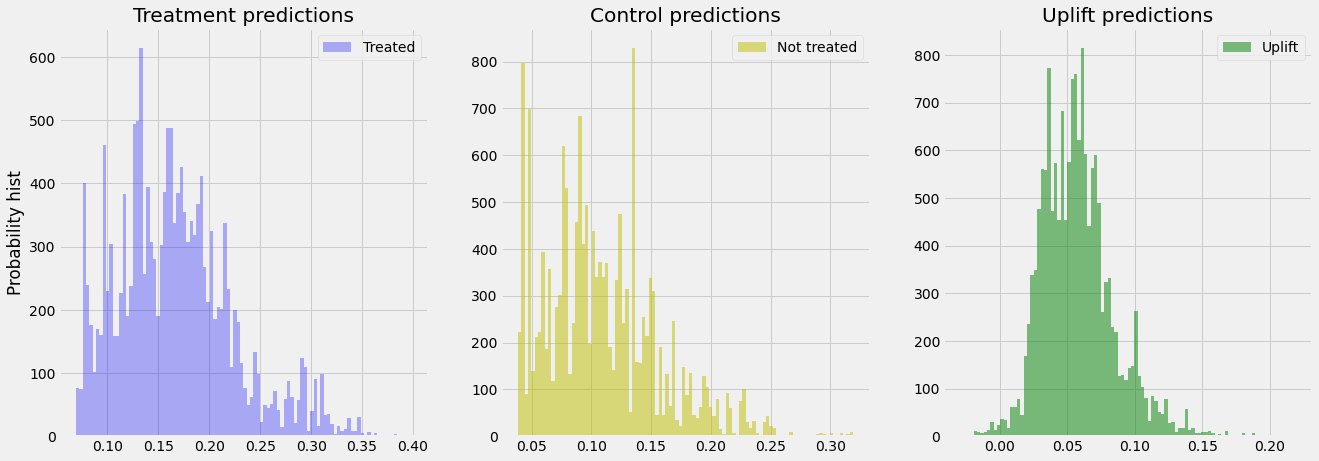

In [83]:
from sklift.models import TwoModels


tm = TwoModels(     
    estimator_trmnt=CatBoostClassifier(iterations=10, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(iterations=10, thread_count=2, random_state=42, silent=True), 
    method='vanilla'
)   

# method ='ddr_control' ('ddr_treatment') - зависимые модели
tm = tm.fit(
    X_train, y_train, treat_train,
    estimator_trmnt_fit_params={'cat_features': cat_feature}, 
    estimator_ctrl_fit_params={'cat_features': cat_feature}
)

uplift_tm = tm.predict(X_test)

tm_score_1 = uplift_at_k(y_true=y_test, uplift=uplift_tm, treatment=treat_val, strategy='by_group', k=0.1)
tm_score_2 = uplift_at_k(y_true=y_test, uplift=uplift_tm, treatment=treat_val, strategy='by_group', k=0.2)
tm_score_3 = uplift_at_k(y_true=y_test, uplift=uplift_tm, treatment=treat_val, strategy='by_group', k=0.3)
metrics_df['models'].append('TwoModels')
metrics_df['uplift@10%'].append(tm_score_1)
metrics_df['uplift@20%'].append(tm_score_2)
metrics_df['uplift@30%'].append(tm_score_3)
plot_uplift_preds_(trmnt_preds=tm.trmnt_preds_, ctrl_preds=tm.ctrl_preds_);

In [84]:
metrics_df

{'models': ['SoloModel', 'ClassTransformation', 'TwoModels'],
 'uplift@10%': [0.12767099075213836, 0.12032741007269931, 0.10965396795337141],
 'uplift@20%': [0.10705557745368546, 0.09272237550913151, 0.09373625892348793],
 'uplift@30%': [0.10387159570174692, 0.08593159237815473, 0.09302088453474963]}

*для модели S-learner построить зависимость таргета (конверсии - поле conversion) от значения uplift:
сделать прогноз и получить uplift для тестовой выборки
отсортировать тестовую выборку по uplift по убыванию
разбить на децили (pandas qcut вам в помощь)
для каждого дециля посчитать среднюю conversion

In [91]:
n = 10
df_t = pd.DataFrame({
    'true': y_test[:n],
    'uplift': uplift_sm[:n],
    'treat': treat_val[:n]
})   
df 

,true,uplift,treat
41958,0,0.035093,1
25590,0,0.077437,0
22211,1,0.039822,1
52667,0,0.035770,1
41702,0,0.042870,1
42611,0,0.064407,1
5568,0,0.033183,1
8713,0,0.051397,1
52350,0,0.061200,1
21049,0,0.052150,0


In [96]:
k = 0.7

uplift_at_k(y_true=df_t['true'], uplift=df_t['uplift'], treatment=df_t['treat'],
            # strategy='by_group',
            strategy='overall',
            k=k)

0.2

In [97]:
df_k = df.sort_values(by='uplift', ascending=False).head(int(n * k))
df_k

,true,uplift,treat
25590,0,0.077437,0
42611,0,0.064407,1
52350,0,0.061200,1
21049,0,0.052150,0
8713,0,0.051397,1
41702,0,0.042870,1
22211,1,0.039822,1


In [98]:
from sklift.metrics import uplift_by_percentile

# uplift by decile, или  uplift by percentile, или uplift by bin.
uplift_by_percentile(y_test, uplift_sm,  treat_val, 
                     strategy='overall', 
                     total=True, std=True, bins=10)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


,n_treatment,n_control,response_rate_treatment,response_rate_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,1073,527,0.259087,0.130930,0.128157,0.013375,0.014694,0.019870
10-20,1037,563,0.216008,0.129663,0.086345,0.012779,0.014158,0.019072
20-30,1080,520,0.206481,0.109615,0.096866,0.012317,0.013700,0.018423
30-40,1075,525,0.179535,0.121905,0.057630,0.011706,0.014279,0.018464
40-50,1078,522,0.159555,0.103448,0.056106,0.011153,0.013330,0.017380
50-60,1055,545,0.175355,0.106422,0.068933,0.011708,0.013209,0.017651
60-70,1072,528,0.132463,0.126894,0.005569,0.010354,0.014486,0.017805
70-80,1049,551,0.139180,0.079855,0.059325,0.010687,0.011548,0.015734
80-90,1055,545,0.124171,0.067890,0.056281,0.010153,0.010776,0.014805


In [99]:
sm_fi = pd.DataFrame({
    'feature_name': sm.estimator.feature_names_,
    'feature_score': sm.estimator.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

sm_fi

,feature_name,feature_score
0,is_referral,18.799359
1,treatment,17.127473
2,used_bogo,16.109315
3,zip_code,11.539820
4,used_discount,10.910239
5,recency,9.745547
6,history,9.601853
7,channel,6.166395
